Dane: https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects

Cel ML: wykrywanie asteroid potencjalnie zagrażających Ziemi

Cel aplikacji: aplikacja dla NASA

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend import plotting

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score

plt.rcParams["figure.figsize"] = (18,6) ## zmiana wielkości wykresów 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("neo_v2.csv")

In [3]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [5]:
df.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

In [6]:
df.shape

(90836, 10)

In [7]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [8]:
df.isna().max() 

id                    False
name                  False
est_diameter_min      False
est_diameter_max      False
relative_velocity     False
miss_distance         False
orbiting_body         False
sentry_object         False
absolute_magnitude    False
hazardous             False
dtype: bool

In [9]:
#usuwamy 4 kolumny, które nic nie wnosza: orbiting_body i sentry_object oraz id i name 

In [10]:
df = df.drop(['id','name','orbiting_body','sentry_object'], axis=1)

In [11]:
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [12]:
df.columns[:2]

Index(['est_diameter_min', 'est_diameter_max'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x27459e31c10>,
 'caps': [<matplotlib.lines.Line2D at 0x27459e521f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27459e237c0>,
 'medians': [<matplotlib.lines.Line2D at 0x27459e52790>,
 'fliers': [<matplotlib.lines.Line2D at 0x27459e52a60>,
 'means': []}

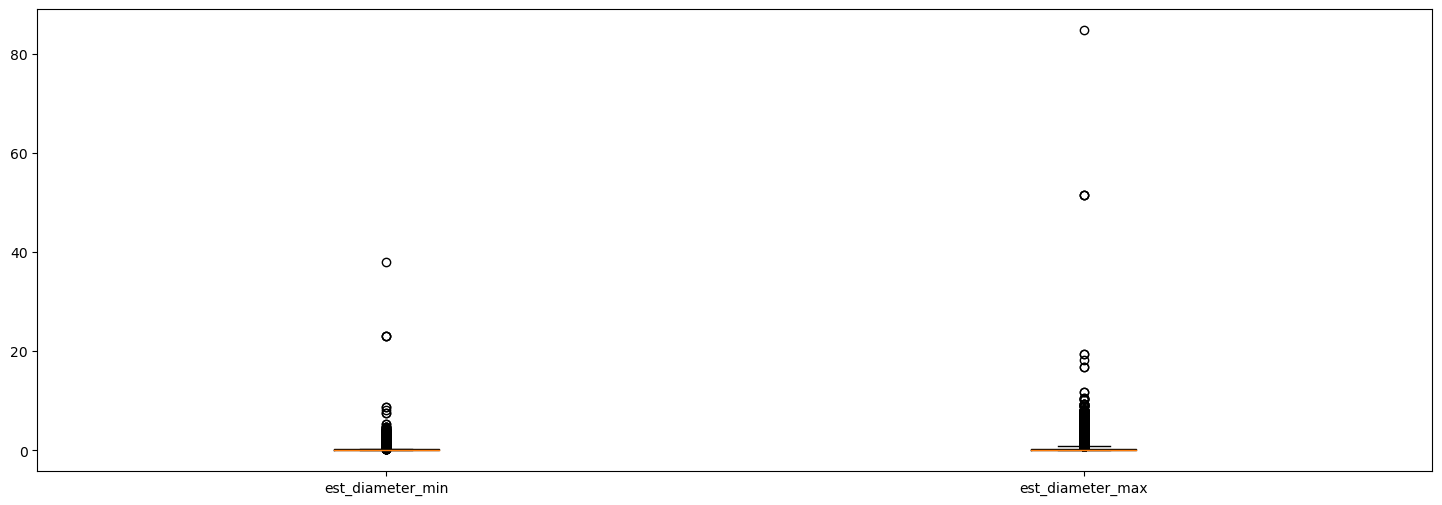

In [13]:
plt.boxplot(x=df[[ 'est_diameter_min', 'est_diameter_max']],
            labels=df.columns[:2])

{'whiskers': [<matplotlib.lines.Line2D at 0x274595f4fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x274596045b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x274595f4d00>],
 'medians': [<matplotlib.lines.Line2D at 0x27459604b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x27459604e20>],
 'means': []}

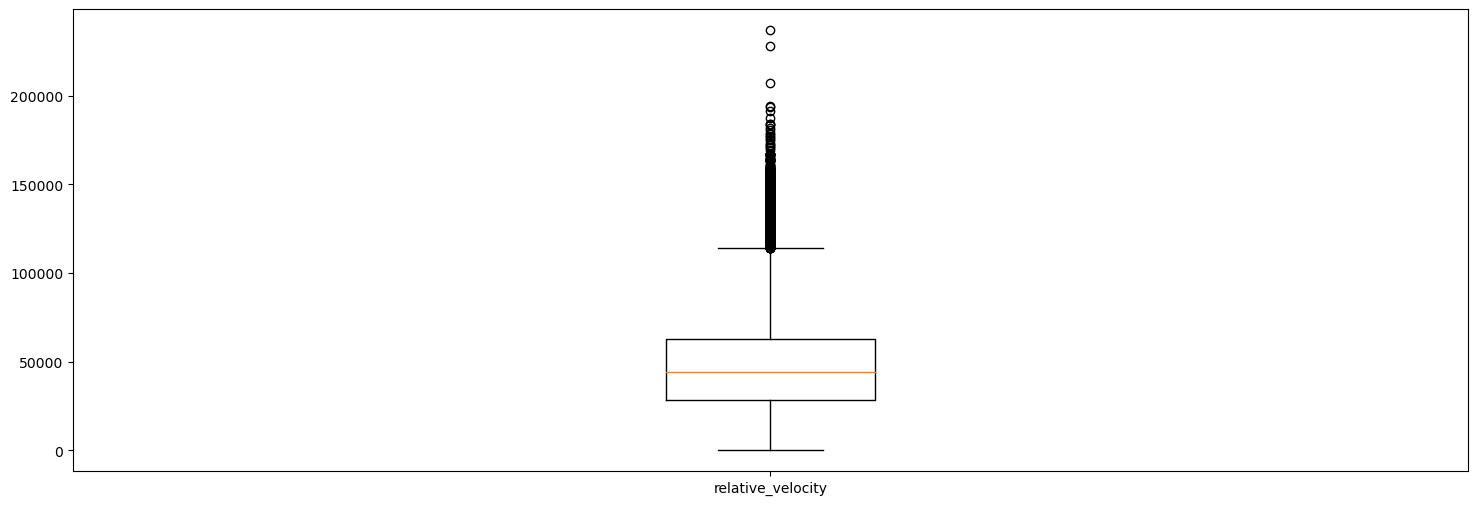

In [14]:
plt.boxplot(x=df[[  'relative_velocity']], 
            labels=['relative_velocity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x27459668370>,
 'caps': [<matplotlib.lines.Line2D at 0x27459668910>,
 'boxes': [<matplotlib.lines.Line2D at 0x274596680a0>],
 'medians': [<matplotlib.lines.Line2D at 0x27459668eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x274596781c0>],
 'means': []}

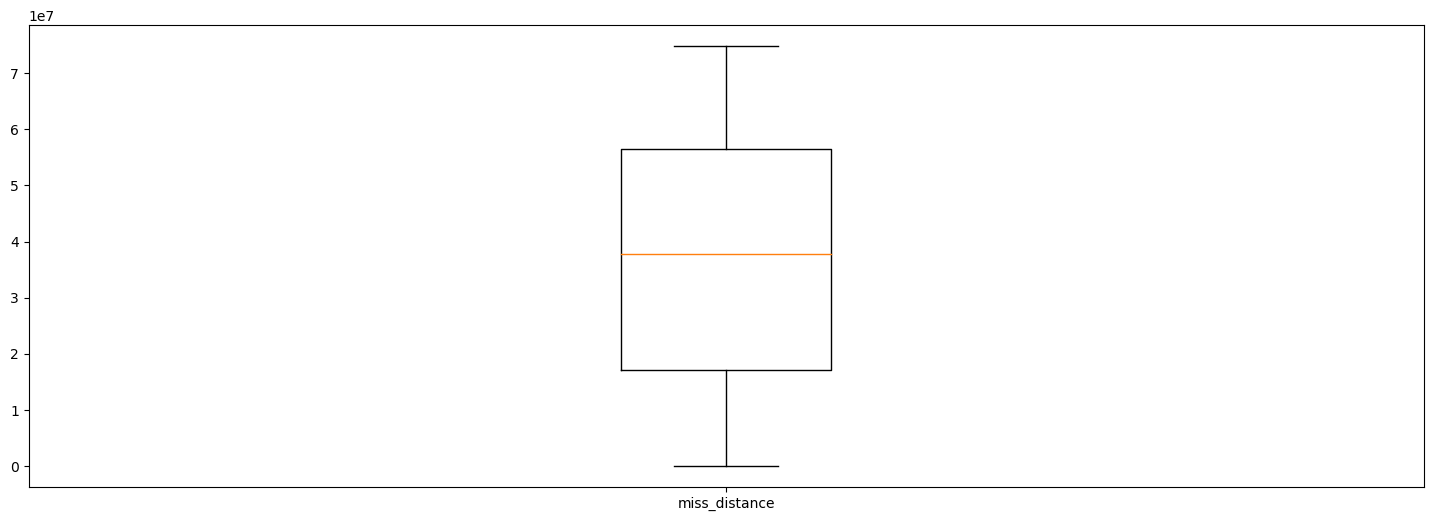

In [15]:
plt.boxplot(x=df[[  'miss_distance']], 
            labels=['miss_distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x27459ea76d0>,
 'caps': [<matplotlib.lines.Line2D at 0x27459ea7c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x27459ea7400>],
 'medians': [<matplotlib.lines.Line2D at 0x27459eb5250>],
 'fliers': [<matplotlib.lines.Line2D at 0x27459eb5520>],
 'means': []}

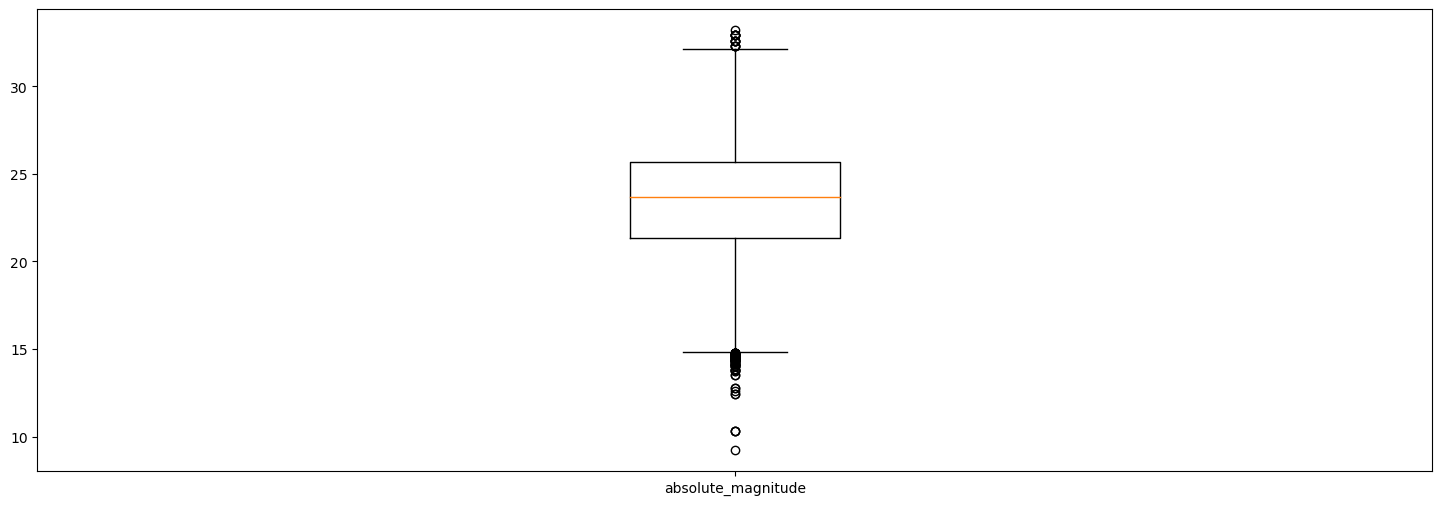

In [16]:
plt.boxplot(x=df[[ 'absolute_magnitude']], 
            labels=['absolute_magnitude'])

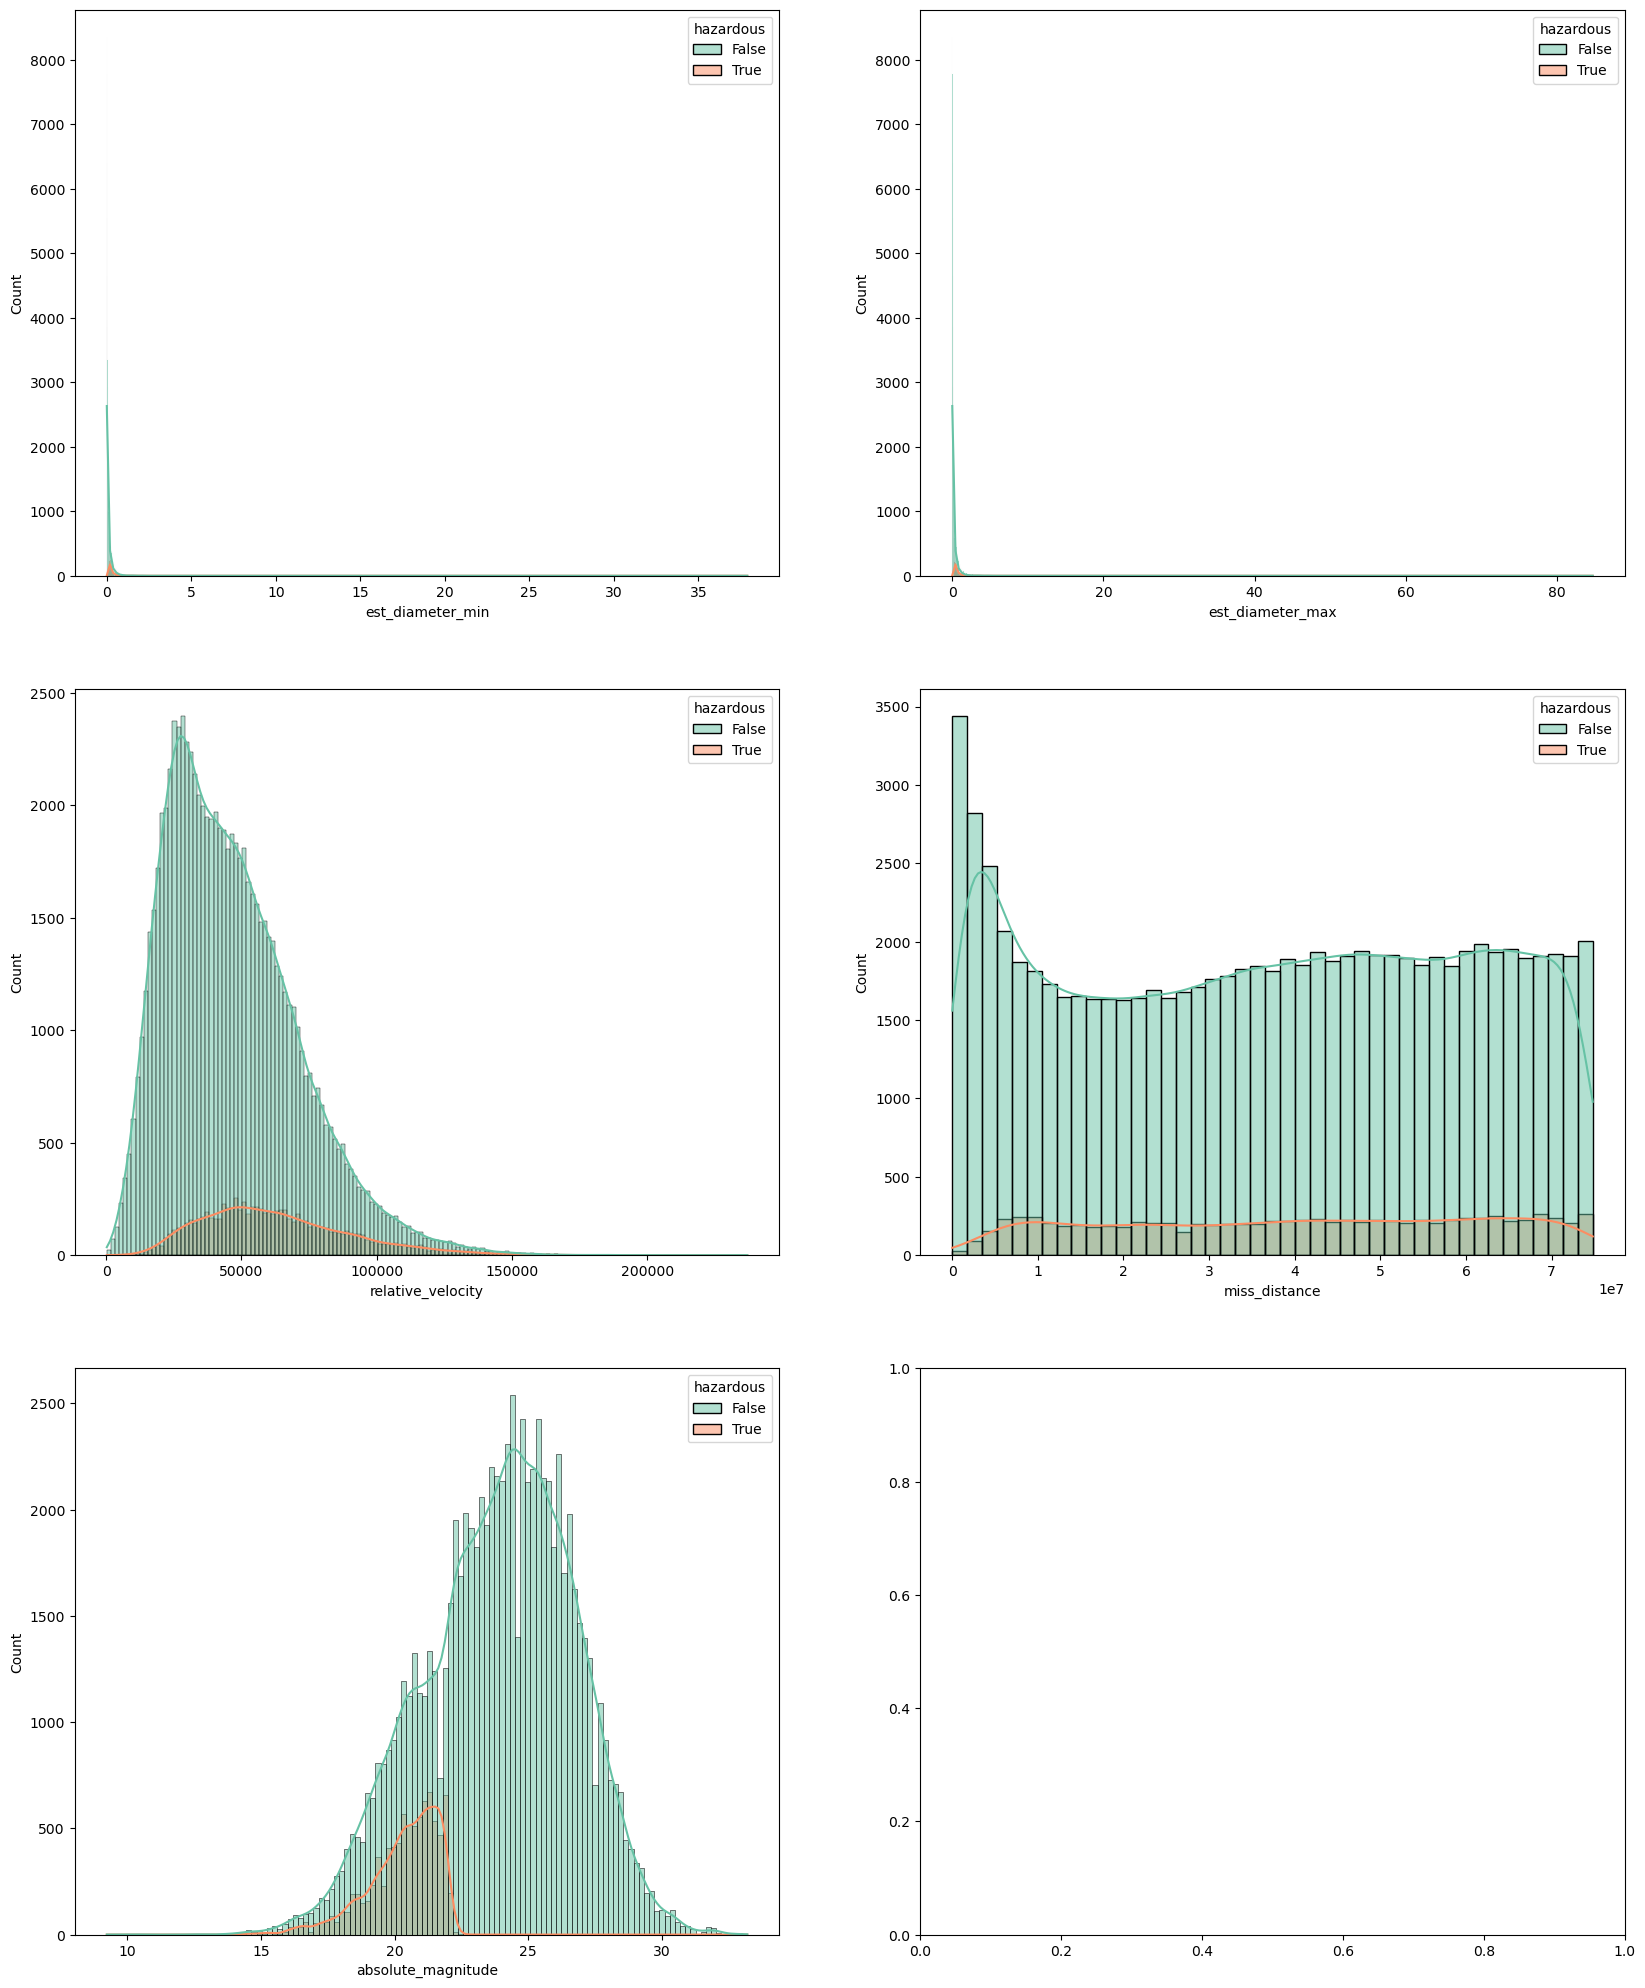

In [17]:
feature_cols = list(df.columns)[:-1]
target_var = df.columns[-1]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,25))

for i, col in enumerate(feature_cols):
    sns.histplot(data = df, x = col, ax = axes[i//2, i%2], hue = target_var, fill = True, kde=True, palette='Set2')

<AxesSubplot:xlabel='est_diameter_max', ylabel='Count'>

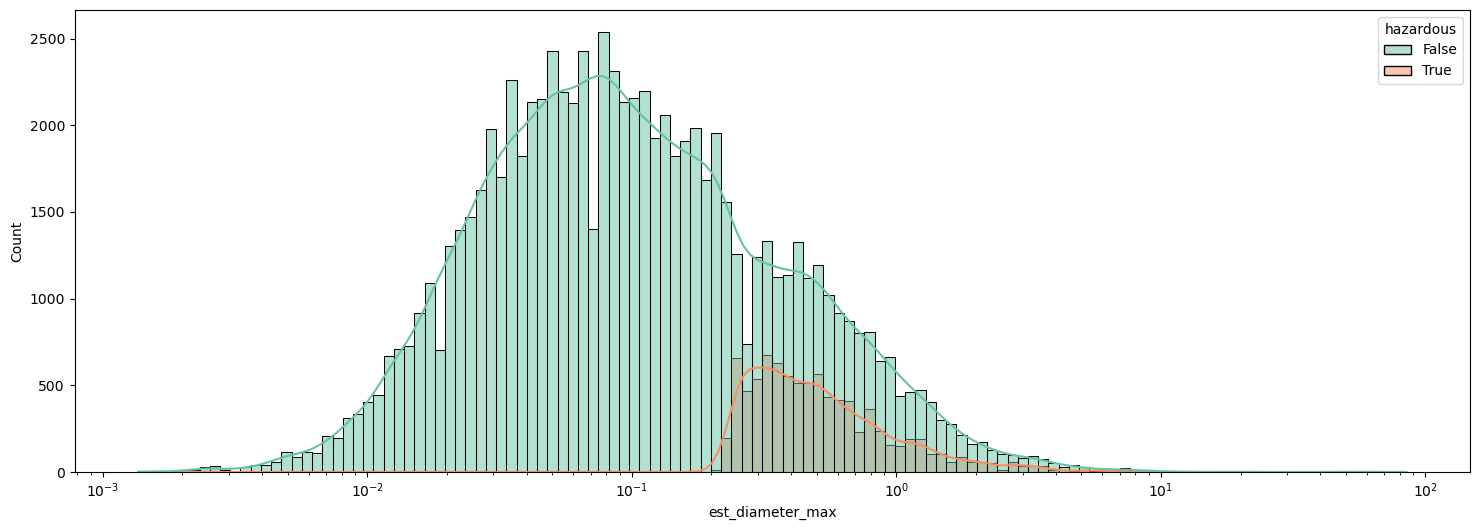

In [18]:
sns.histplot(data = df, x = 'est_diameter_max', hue ='hazardous' , fill = True, kde=True, palette='Set2', log_scale=True)

<AxesSubplot:xlabel='est_diameter_min', ylabel='Count'>

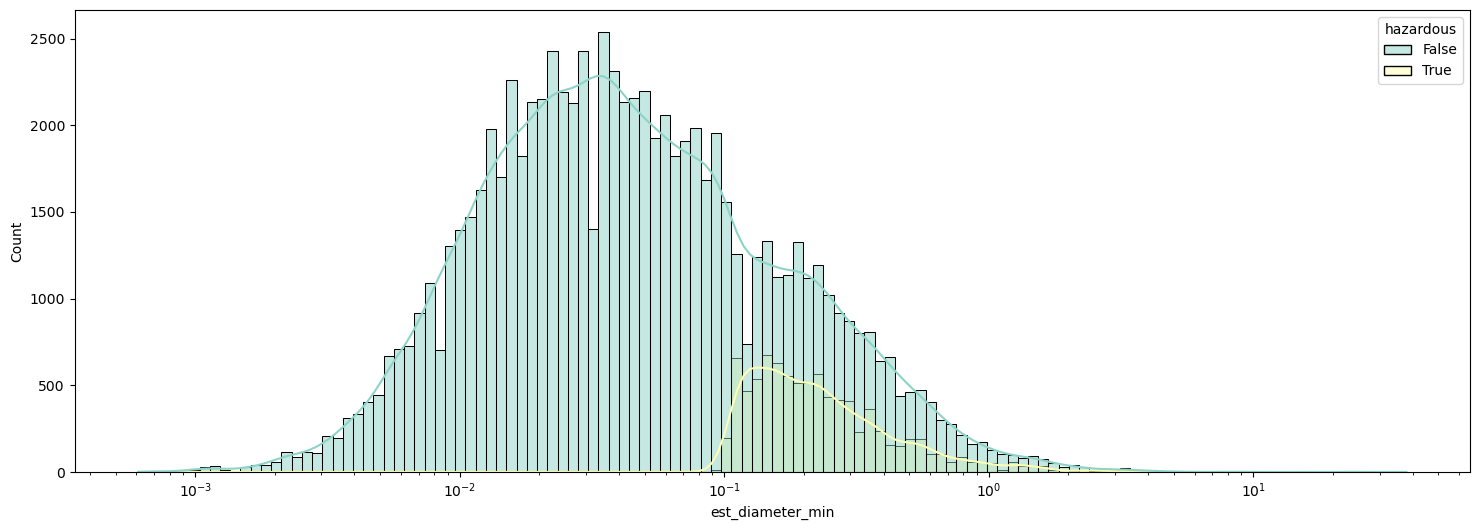

In [19]:
sns.histplot(data = df, x = 'est_diameter_min', hue ='hazardous' , fill = True, kde=True, palette='Set3', log_scale=True)

(0.0, 1.0)

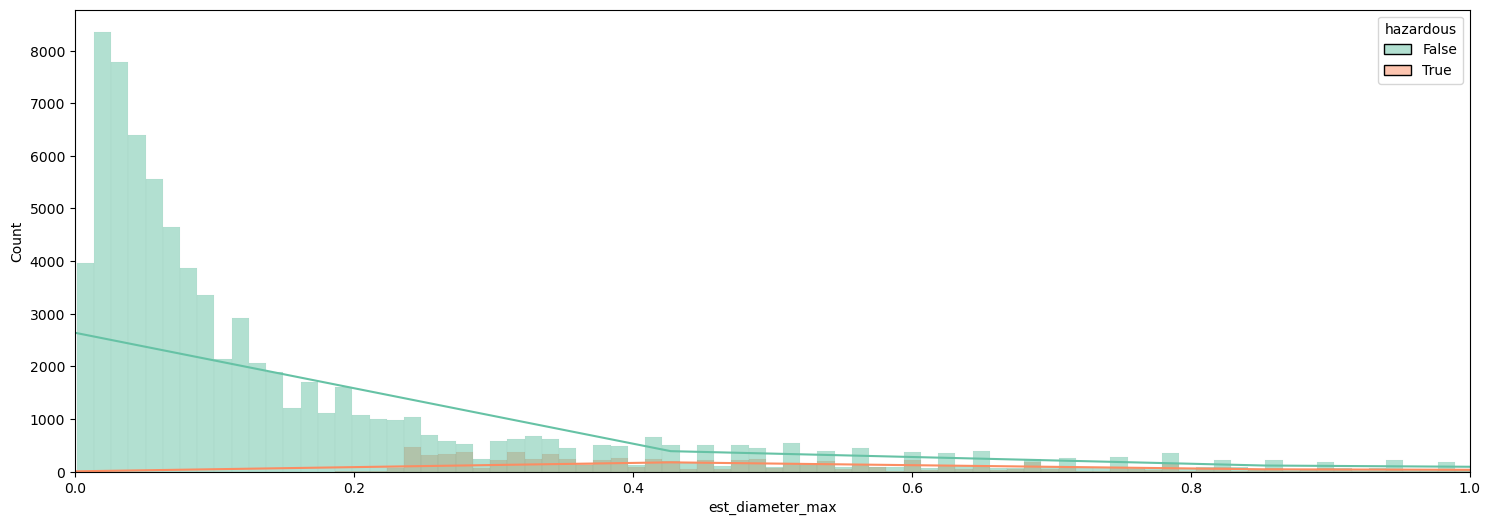

In [20]:
sns.histplot(data = df, x = 'est_diameter_max', hue ='hazardous' , fill = True, kde=True, palette='Set2')
plt.xlim([0, 1])

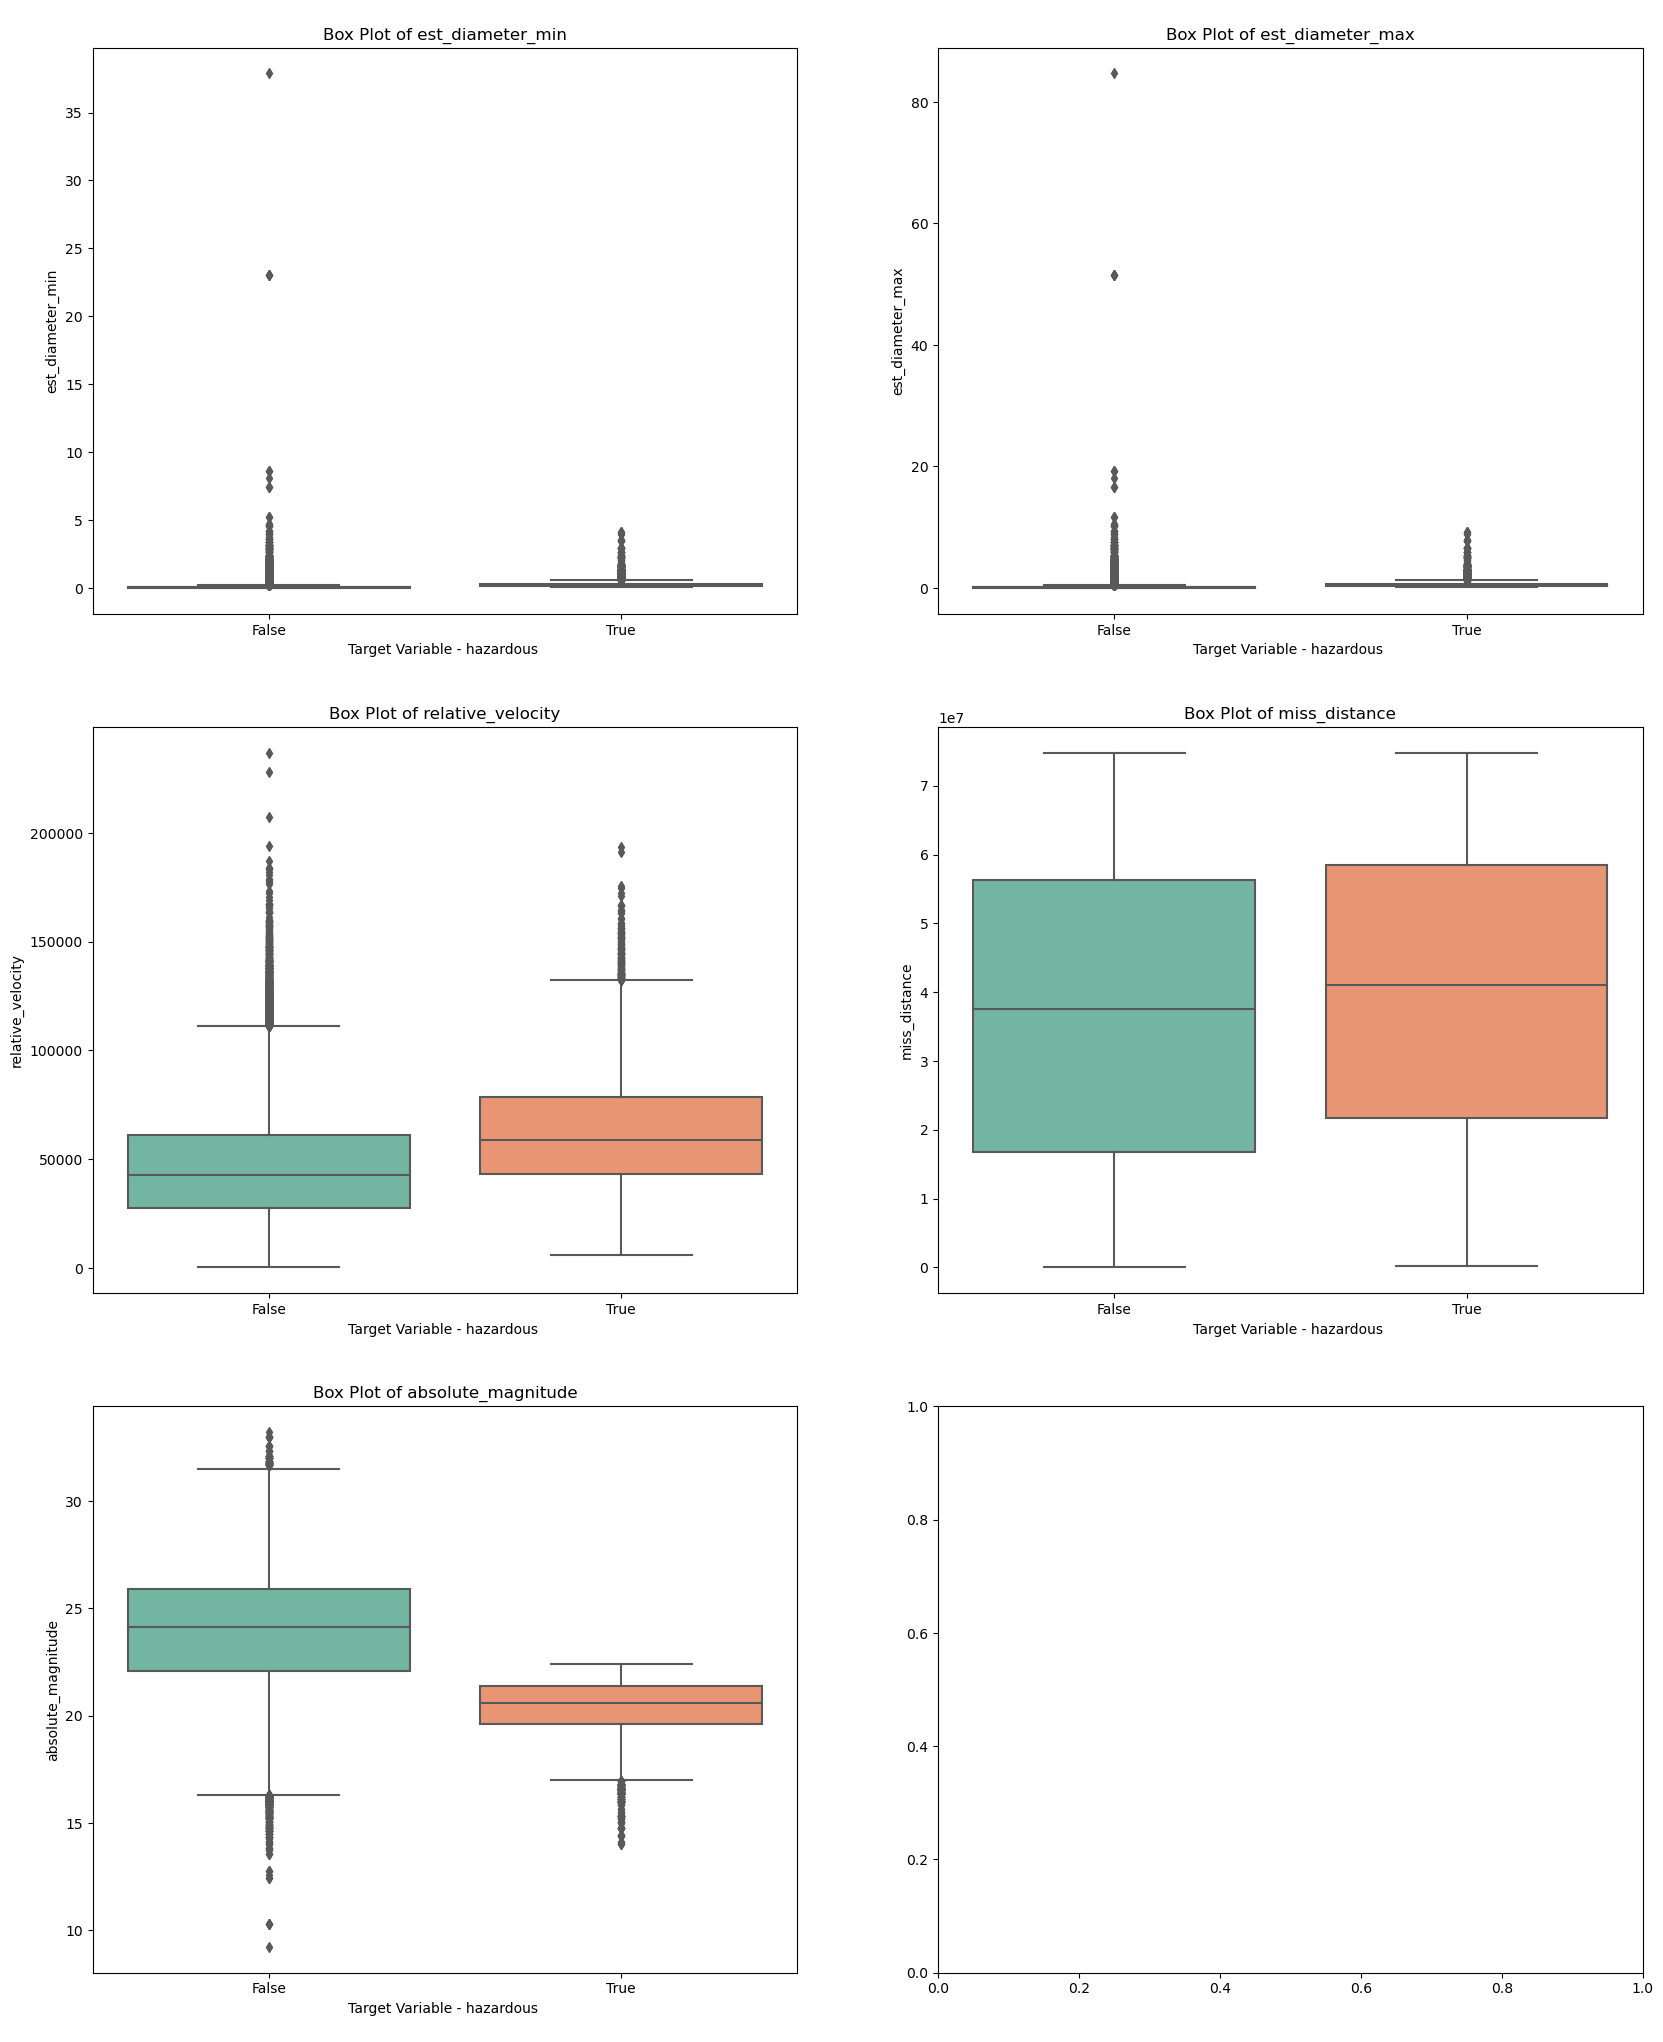

In [21]:
feature_cols = list(df.columns)[:-1]
target_var = df.columns[-1]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,25))

for i, col in enumerate(feature_cols):
    sns.boxplot(x=target_var, y=col, data=df, ax=axes[i//2, i%2], palette='Set2')
    axes[i//2, i%2].set_xlabel('Target Variable - hazardous \n', size=10)
    axes[i//2, i%2].set_ylabel(col, size=10)
    axes[i//2, i%2].set_title('\nBox Plot of ' + col, size=12)

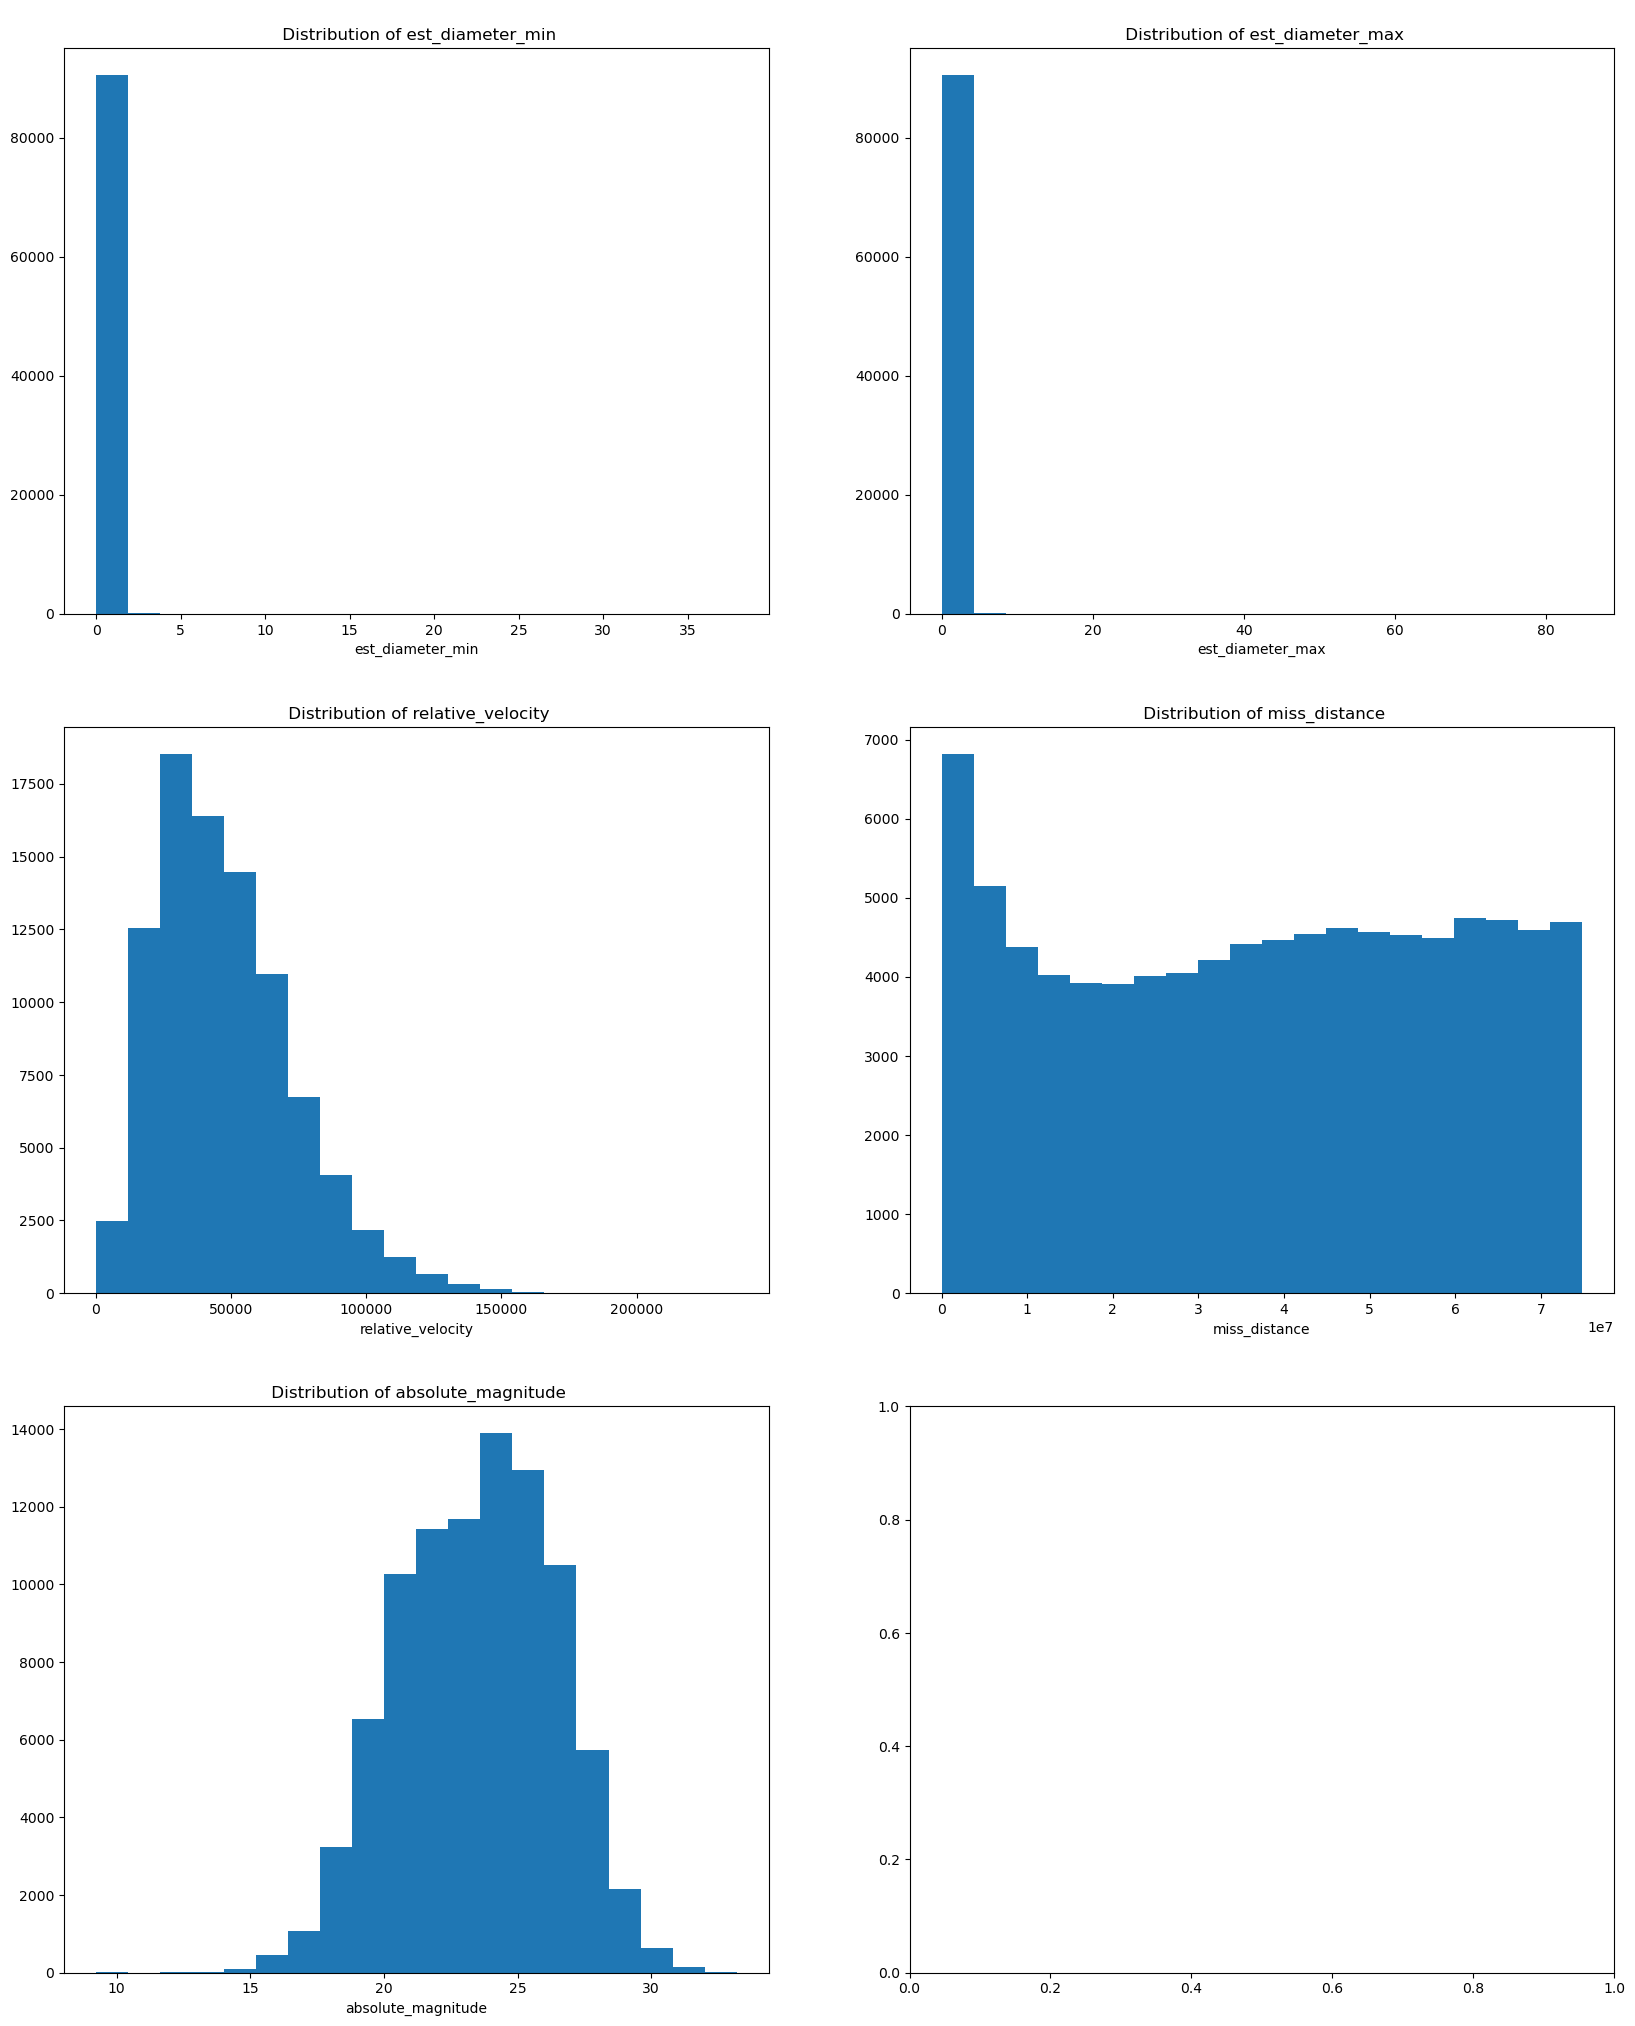

In [22]:
feature_cols = list(df.columns)[:-1]
target_var = df.columns[-1]


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,25))
for i, col in enumerate(feature_cols):
    axes[i//2, i%2].hist(df[col],bins=20)
    axes[i//2, i%2].set_xlabel(col, size=10)
    axes[i//2, i%2].set_title('\n Distribution of ' + col, size=12)

In [23]:
feature_cols = list(df.columns)[:-1]

for col in feature_cols:
    print('Ilość istotnych braków w pomiarach ', col,': ',(df[df[col] ==0].shape[0]))
    print('Udział istotnych braków w pomiarach' , col,': ', (round(df[df[col] ==0].shape[0]/df.shape[0],2)), '\n')

Ilość istotnych braków w pomiarach  est_diameter_min :  0
Udział istotnych braków w pomiarach est_diameter_min :  0.0 

Ilość istotnych braków w pomiarach  est_diameter_max :  0
Udział istotnych braków w pomiarach est_diameter_max :  0.0 

Ilość istotnych braków w pomiarach  relative_velocity :  0
Udział istotnych braków w pomiarach relative_velocity :  0.0 

Ilość istotnych braków w pomiarach  miss_distance :  0
Udział istotnych braków w pomiarach miss_distance :  0.0 

Ilość istotnych braków w pomiarach  absolute_magnitude :  0
Udział istotnych braków w pomiarach absolute_magnitude :  0.0 



In [24]:
df.isnull().sum()

est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [25]:
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [26]:
df_true = df[df['hazardous']==True].reset_index(drop=True)
df_false = df[df['hazardous']==False].reset_index(drop=True)

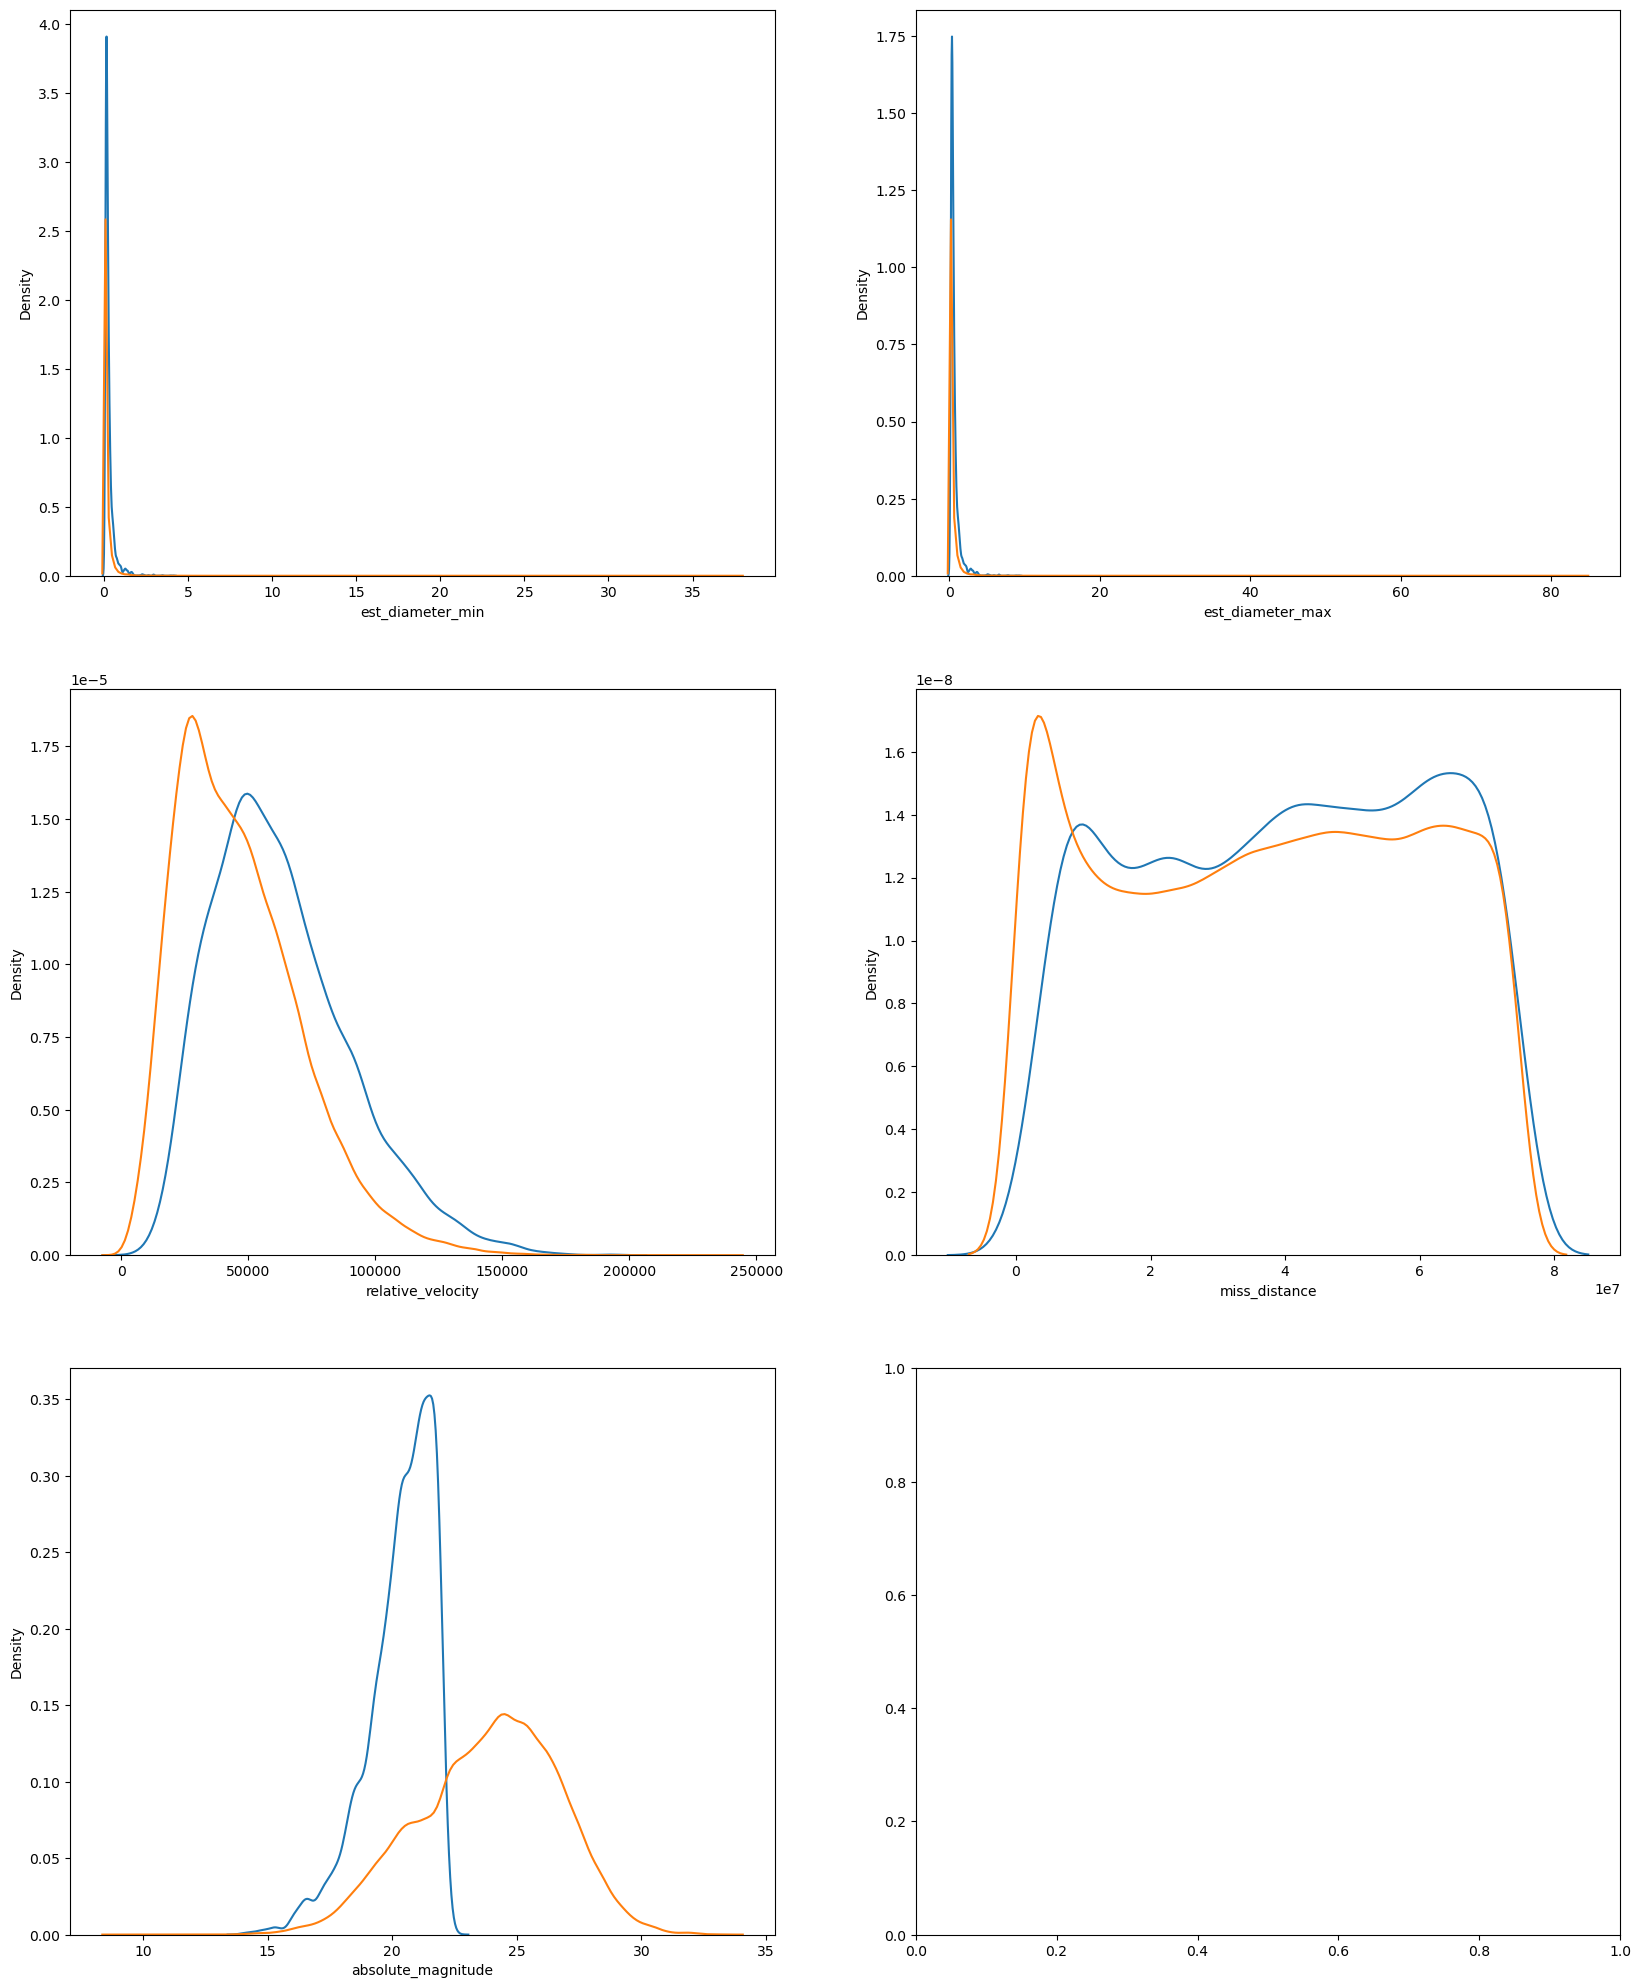

In [27]:
feature_cols = list(df.columns)[:-1]
target_var = df.columns[-1]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,25))

for i, col in enumerate(feature_cols):
    sns.kdeplot(col, data=df_true, ax=axes[i//2, i%2])
    sns.kdeplot(col, data=df_false, ax=axes[i//2, i%2])

In [28]:
df = pd.get_dummies(df, columns = ['hazardous'], drop_first= True)
# zmienna targetu przyjmuje dwie wartości więc modyfikujemy w miejscu na binarną

In [29]:
df

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous_True
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,0
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,0
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,0
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,0


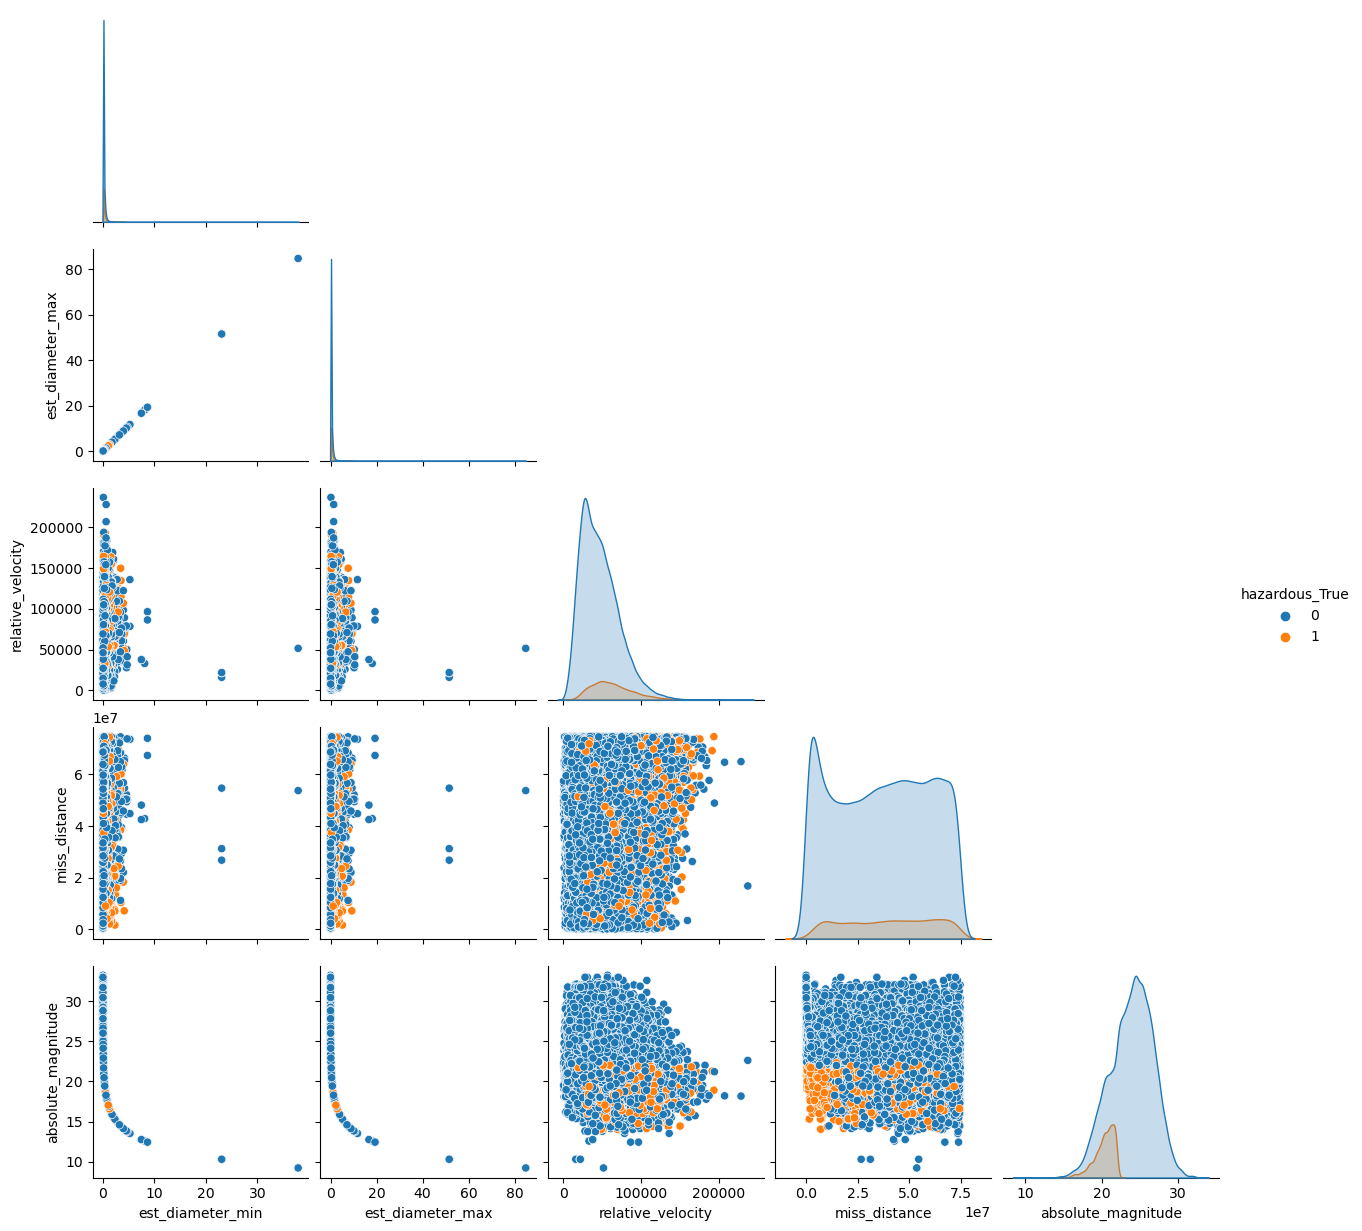

In [30]:
#związek między zmiennymi
sns.pairplot(df, hue='hazardous_True',corner=True)

In [31]:
df.corr()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous_True
est_diameter_min,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
est_diameter_max,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
relative_velocity,0.221553,0.221553,1.000000,0.327169,-0.353863,0.191185
miss_distance,0.142241,0.142241,0.327169,1.000000,-0.264168,0.042302
absolute_magnitude,-0.560188,-0.560188,-0.353863,-0.264168,1.000000,-0.365267
hazardous_True,0.183363,0.183363,0.191185,0.042302,-0.365267,1.000000


<AxesSubplot:>

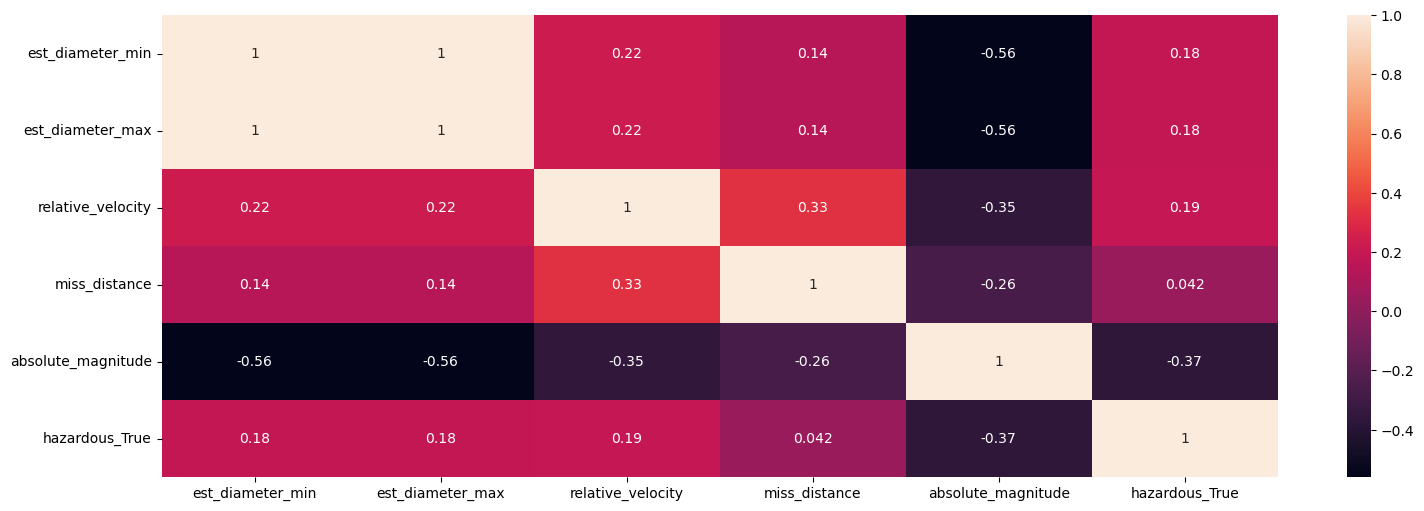

In [32]:
sns.heatmap(df.corr(),annot=True)

In [33]:
# zmianna targetu

In [34]:
df.hazardous_True.value_counts()

0    81996
1     8840
Name: hazardous_True, dtype: int64

In [35]:
target = round(df.hazardous_True.value_counts()/df.shape[0],3)

In [36]:
target = pd.DataFrame(target)
target

,hazardous_True
0,0.903
1,0.097


## Data preparation

In [37]:
df.columns

Index(['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude', 'hazardous_True'],
      dtype='object')

In [38]:
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous_True
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1


In [39]:
cols  =['est_diameter_max', 'relative_velocity','miss_distance', 'absolute_magnitude']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['hazardous_True'], test_size=0.3, random_state=42)

#### standaryzacja

In [41]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

## Regresja logistyczna

In [42]:
model_lr = LogisticRegression(random_state=42).fit(X_train, y_train)

In [43]:
y_pred_model_lr = model_lr.predict(X_test)

In [44]:
print(classification_report(y_test,y_pred_model_lr))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     24597
           1       0.48      0.08      0.13      2654

    accuracy                           0.90     27251
   macro avg       0.69      0.53      0.54     27251
weighted avg       0.87      0.90      0.87     27251



In [45]:
cnf_matrix = confusion_matrix(y_test,y_pred_model_lr)
cnf_matrix

array([[24372,   225],
       [ 2447,   207]], dtype=int64)

Text(0.5, 286.0444444444445, 'Predicted label')

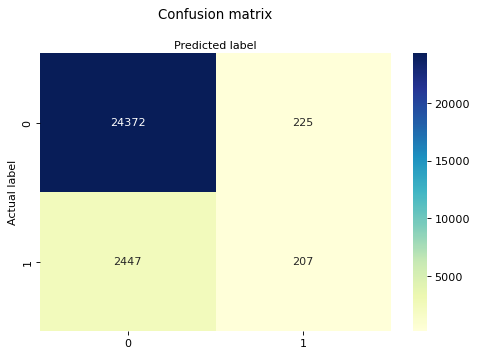

In [46]:
#wizulaizacja dla confusion_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 4), dpi=80)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
Scores_lr = {'Accuracy':round(accuracy_score(y_test,y_pred_model_lr),3),
          'F1_score':round(f1_score(y_test,y_pred_model_lr),3),
          'Recall':round(recall_score(y_test,y_pred_model_lr),3),
          'Precision':round(precision_score(y_test,y_pred_model_lr),3)}
df_lr=pd.DataFrame(data=Scores_lr,index=['Logostic_Regresion'])
df_lr

,Accuracy,F1_score,Recall,Precision
Logostic_Regresion,0.902,0.134,0.078,0.479


## Drzewo decyzyjne

In [48]:
tree_1 = DecisionTreeClassifier(random_state=42, max_depth=3,criterion='gini').fit(X_train, y_train)

[Text(0.5, 0.875, 'X[0] <= -0.081\ngini = 0.176\nsamples = 63585\nvalue = [57399, 6186]'),
 Text(0.25, 0.625, 'X[0] <= -0.097\ngini = 0.002\nsamples = 43136\nvalue = [43091, 45]'),
 Text(0.125, 0.375, 'X[3] <= -0.459\ngini = 0.001\nsamples = 42443\nvalue = [42432, 11]'),
 Text(0.0625, 0.125, 'gini = 0.025\nsamples = 626\nvalue = [618, 8]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 41817\nvalue = [41814, 3]'),
 Text(0.375, 0.375, 'X[0] <= -0.095\ngini = 0.093\nsamples = 693\nvalue = [659, 34]'),
 Text(0.3125, 0.125, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.4375, 0.125, 'gini = 0.079\nsamples = 684\nvalue = [656, 28]'),
 Text(0.75, 0.625, 'X[2] <= -1.148\ngini = 0.42\nsamples = 20449\nvalue = [14308, 6141]'),
 Text(0.625, 0.375, 'X[2] <= -1.319\ngini = 0.258\nsamples = 947\nvalue = [144, 803]'),
 Text(0.5625, 0.125, 'gini = 0.061\nsamples = 446\nvalue = [14, 432]'),
 Text(0.6875, 0.125, 'gini = 0.384\nsamples = 501\nvalue = [130, 371]'),
 Text(0.875, 0.375, 'X[1] <= -1.05

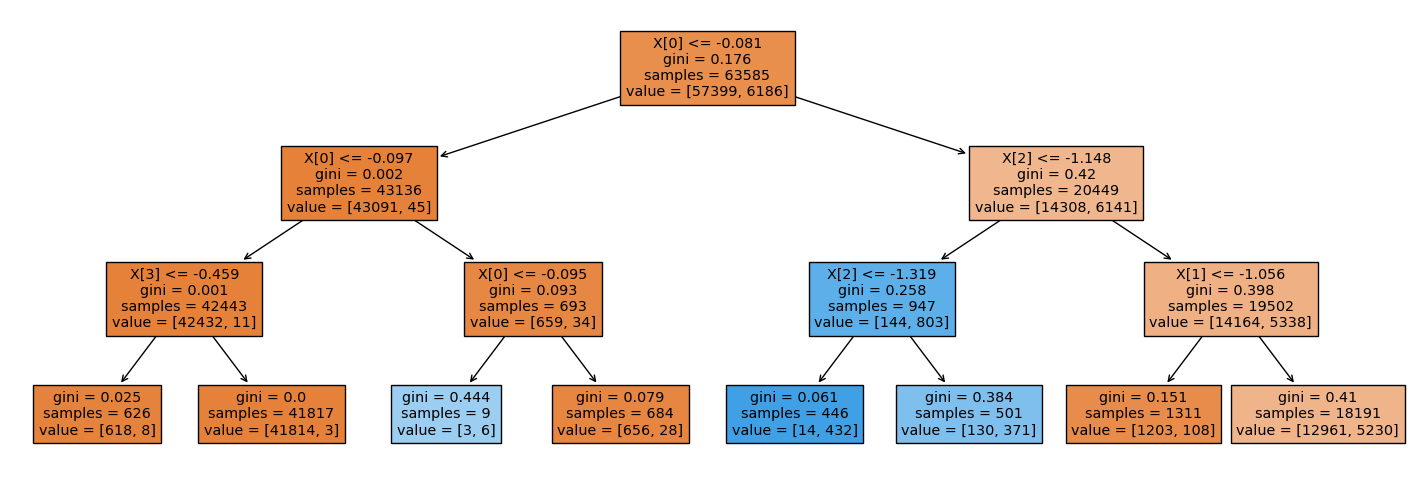

In [49]:
plot_tree(tree_1,filled=True)

In [50]:
tree_1.feature_importances_

array([7.75268389e-01, 3.19757389e-02, 1.92693975e-01, 6.18965118e-05])

In [51]:
y_pred_tree = tree_1.predict(X_test)

In [52]:
print(confusion_matrix(y_test,y_pred_tree))

[[24532    65]
 [ 2354   300]]


Text(0.5, 286.0444444444445, 'Predicted label')

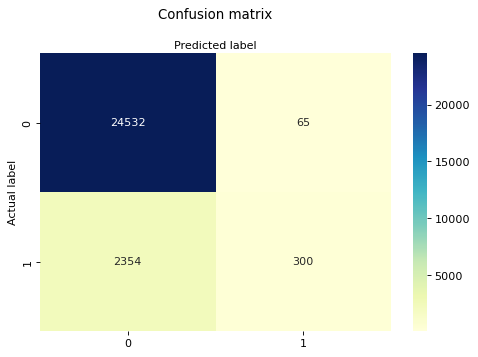

In [53]:
#wizulaizacja dla confusion_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 4), dpi=80)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_tree)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24597
           1       0.82      0.11      0.20      2654

    accuracy                           0.91     27251
   macro avg       0.87      0.56      0.58     27251
weighted avg       0.90      0.91      0.88     27251



In [55]:
Scores_t = {'Accuracy':round(accuracy_score(y_test,y_pred_tree),3),
          'F1_score':round(f1_score(y_test,y_pred_tree),3),
          'Recall':round(recall_score(y_test,y_pred_tree),3),
          'Precision':round(precision_score(y_test,y_pred_tree),3)}
df_t=pd.DataFrame(data=Scores_t,index=['DecisionTreeClassifier'])
df_t

,Accuracy,F1_score,Recall,Precision
DecisionTreeClassifier,0.911,0.199,0.113,0.822


## Lasy losowe

In [56]:
rf_class_1 = RandomForestClassifier(max_depth=5, 
                                    min_samples_split=10, 
                                    min_samples_leaf=5,
                                    class_weight='balanced', 
                                    random_state=42)
rf_class_1 =rf_class_1.fit(X_train, y_train)

In [57]:
#predykcja
pred_train = rf_class_1.predict(X_train)
pred_test = rf_class_1.predict(X_test)

In [58]:
#szybkie sprawdzenie wyników modelu poprzez wbudowaną fukcję score
rf_class_1.score(X_train,y_train) #musi dac dokładnie tą samą warość co accuracy na zbiorze train

0.7858771722890618

In [59]:
rf_class_1.score(X_test,y_test) 

0.785659241862684

In [60]:
#ważność zmiennych
rf_class_1.feature_importances_ 

array([0.46327624, 0.03441791, 0.02062117, 0.48168468])

In [61]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87     57399
           1       0.31      0.99      0.47      6186

    accuracy                           0.79     63585
   macro avg       0.65      0.88      0.67     63585
weighted avg       0.93      0.79      0.83     63585



In [62]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87     24597
           1       0.31      0.99      0.47      2654

    accuracy                           0.79     27251
   macro avg       0.66      0.88      0.67     27251
weighted avg       0.93      0.79      0.83     27251



In [63]:
Scores_rf = {'Accuracy':round(accuracy_score(y_test,pred_test),3),
          'F1_score':round(f1_score(y_test,pred_test),3),
          'Recall':round(recall_score(y_test,pred_test),3),
          'Precision':round(precision_score(y_test,pred_test),3)}
df_rf=pd.DataFrame(data=Scores_rf,index=['RandomForestClassifier'])
df_rf

,Accuracy,F1_score,Recall,Precision
RandomForestClassifier,0.786,0.474,0.991,0.311


In [64]:
print(confusion_matrix(y_test,pred_test))

[[18779  5818]
 [   23  2631]]


Text(0.5, 286.0444444444445, 'Predicted label')

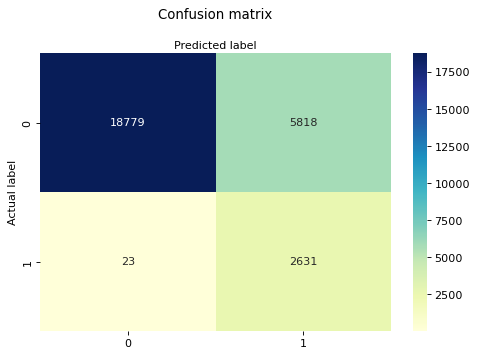

In [65]:
#wizulaizacja dla confusion_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 4), dpi=80)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,pred_test)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### sprawdzeie modelu pod kątem krzywej ROC (opcjonalnie)

In [66]:
#sprawdzeie modelu pod kątem krzywej ROC (działa na prawdopodobienstwie (lub score)z modelu, a nie na wartosciach klas - tak jak classification_report)
#zwsze robimy nie na predict tylko na predict_proba
from sklearn.metrics import roc_auc_score, roc_curve

In [67]:
pred_train_proba = rf_class_1.predict_proba(X_train) #wyrzuci prawd. lub score przyporzadkowaia do jedynki lub zera
pred_test_proba = rf_class_1.predict_proba(X_test)

In [68]:
pred_train_proba

array([[9.99850936e-01, 1.49063753e-04],
       [9.99862271e-01, 1.37728932e-04],
       [9.99862271e-01, 1.37728932e-04],
       ...,
       [2.07042901e-01, 7.92957099e-01],
       [2.14261749e-01, 7.85738251e-01],
       [9.99960874e-01, 3.91257611e-05]])

In [69]:
pred_train_proba = rf_class_1.predict_proba(X_train)[:,1]
pred_test_proba = rf_class_1.predict_proba(X_test)[:,1]

In [70]:
#pole pod krzywą ROC za pomocą funckji roc_auc_score
#pole pod krzywą powinno byc od 0.5 (model losowy) do 1 (model idealny)
roc_auc_score(y_train,pred_train_proba)

0.915568475422723

In [71]:
roc_auc_score(y_test,pred_test_proba)

0.9134600398974038

In [72]:
#krzywa ROC zwraca 3 argumenty: false_positive_rate, true_positive_rate, i treshholds, dla których zostały wiliczone)
fpr_train, tpr_train, thresholds =roc_curve(y_train, pred_train_proba)
fpr_test, tpr_test, thresholds_test =roc_curve(y_test, pred_test_proba)

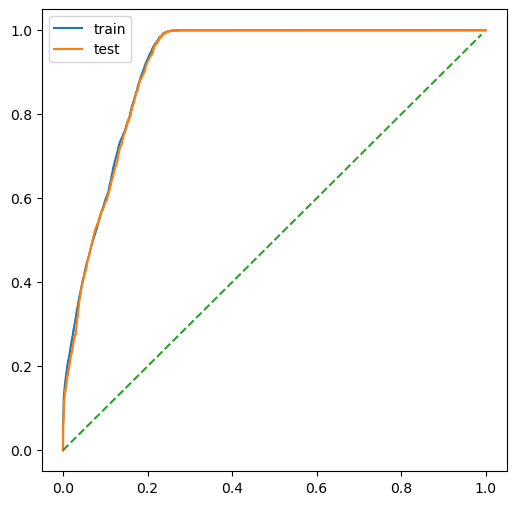

In [73]:
plt.rcParams["figure.figsize"] = (6,6)
plt.plot(fpr_train,tpr_train, label='train')
plt.plot(fpr_test,tpr_test,label='test')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--') #odnieisienie do modelu losowego
plt.legend()
plt.show()

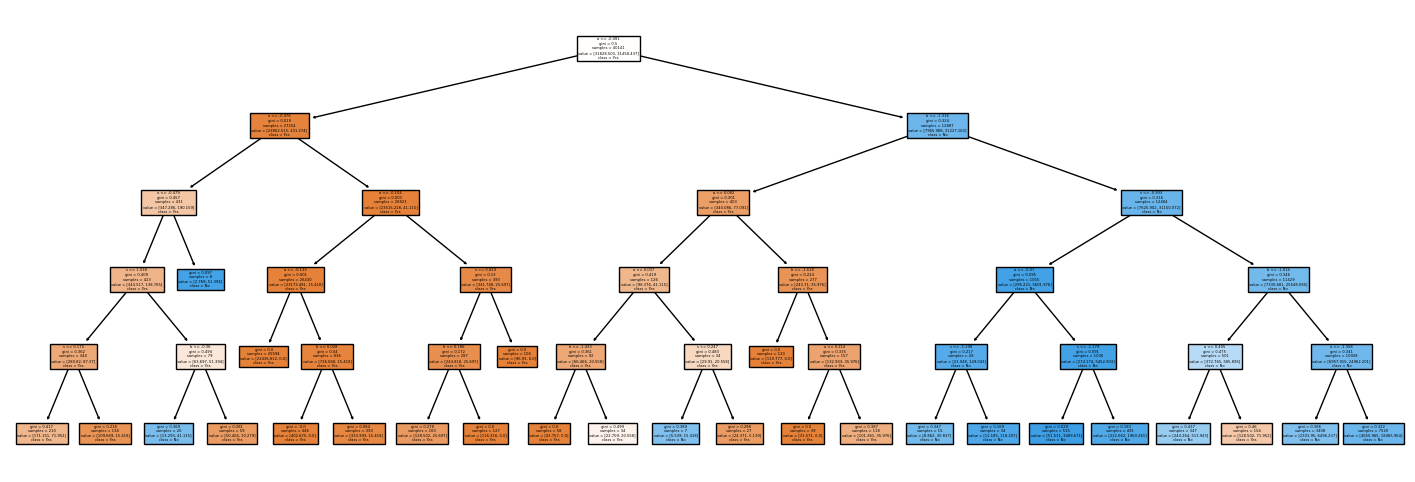

In [108]:
#wizualizacja przykładowego drzewo z modelu lasu
plt.rcParams["figure.figsize"] = (18,6)
plot_tree(rf_class_1.estimators_[2],
          feature_names=col,
          class_names=['Yes','No'],
          filled=True)
plt.show()

### Dobór parametrów dla lasów

In [109]:
# liscie
tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2,50,1):
    tree_classifier = DecisionTreeClassifier(max_leaf_nodes=i).fit(X_train,y_train)
    tree_train_scores.append(tree_classifier.score(X_train,y_train))
    tree_test_scores.append(tree_classifier.score(X_test,y_test))

    rf_classifier = RandomForestClassifier(max_leaf_nodes=i, n_estimators=50).fit(X_train,y_train)
    rf_train_scores.append(rf_classifier.score(X_train,y_train))
    rf_test_scores.append(rf_classifier.score(X_test,y_test))

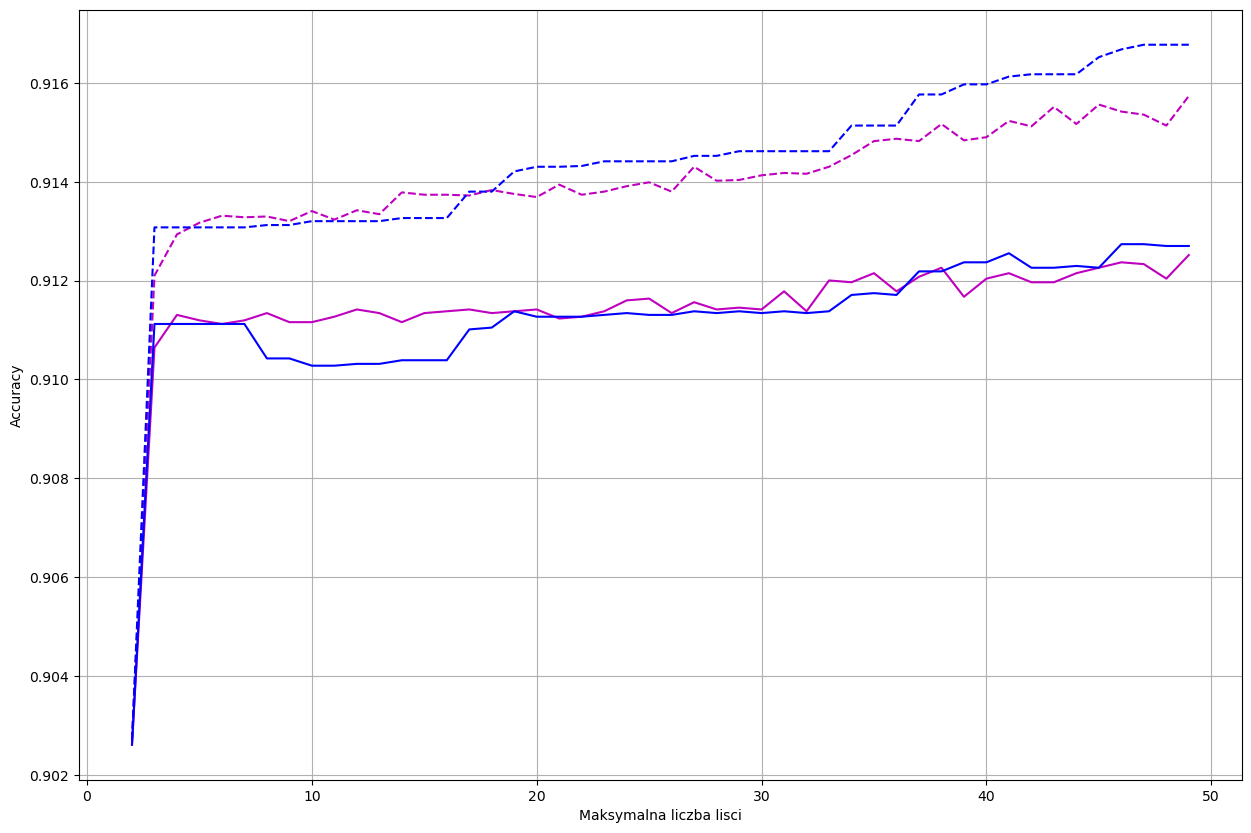

In [110]:
plt.figure(figsize=(15,10))
plt.xlabel('Maksymalna liczba lisci')
plt.ylabel('Accuracy')

plt.plot(range(2,50,1), rf_train_scores,'m--')
plt.plot(range(2,50,1), rf_test_scores, 'm')
plt.plot(range(2,50,1), tree_train_scores, 'b--')
plt.plot(range(2,50,1), tree_test_scores, 'b')
plt.grid()
plt.show()

In [111]:
#max_deph

tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2,15,1):
    tree_classifier = DecisionTreeClassifier(max_depth=i).fit(X_train,y_train)
    tree_train_scores.append(tree_classifier.score(X_train,y_train))
    tree_test_scores.append(tree_classifier.score(X_test,y_test))

    rf_classifier = RandomForestClassifier(max_depth=i, n_estimators=50).fit(X_train,y_train)
    rf_train_scores.append(rf_classifier.score(X_train,y_train))
    rf_test_scores.append(rf_classifier.score(X_test,y_test))

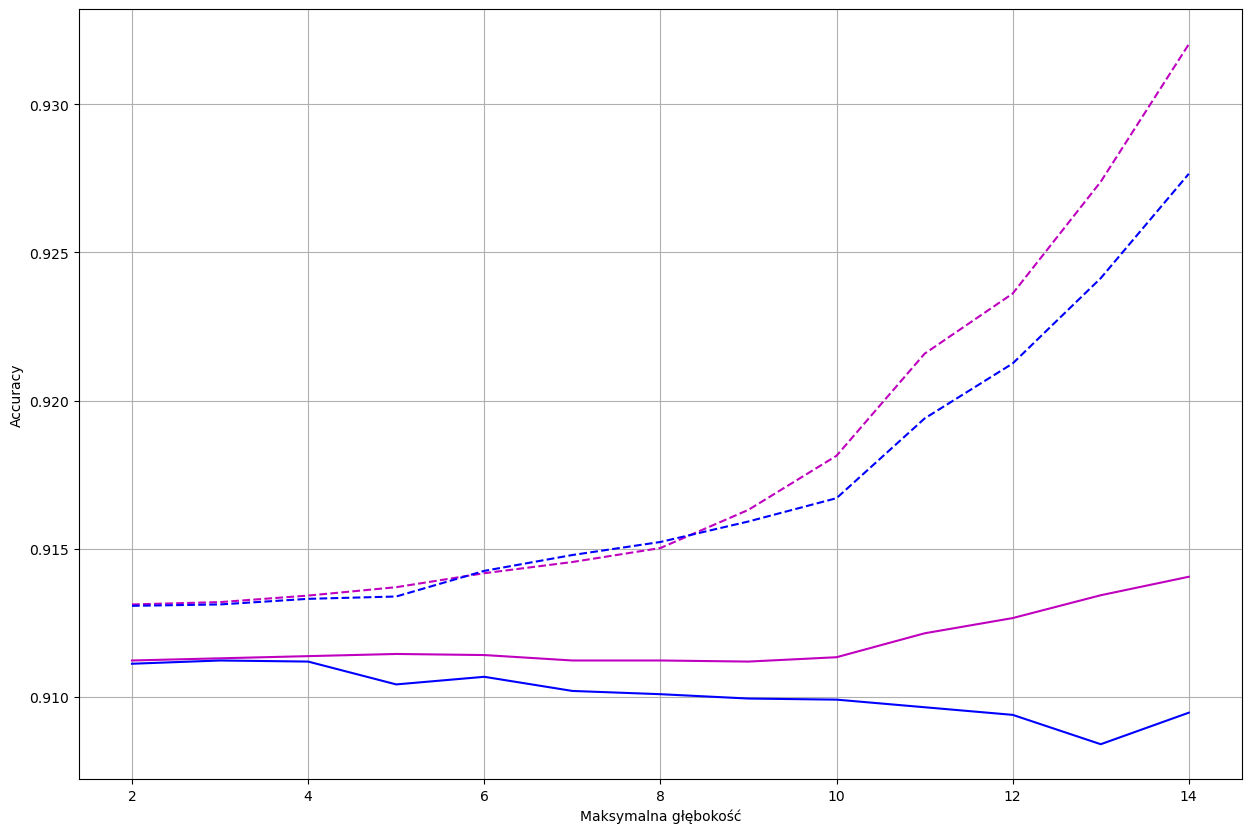

In [112]:
plt.figure(figsize=(15,10))
plt.xlabel('Maksymalna głębokość')
plt.ylabel('Accuracy')

plt.plot(range(2,15,1), rf_train_scores,'m--')
plt.plot(range(2,15,1), rf_test_scores, 'm')
plt.plot(range(2,15,1), tree_train_scores, 'b--')
plt.plot(range(2,15,1), tree_test_scores, 'b')
plt.grid()
plt.show()

In [113]:
#optymalizacja hiperparametrów modelu lasu za pomocą GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [114]:
# tą funckją na modelu - sprawdzamy jaka była jkość modelu na podgrupach zbioru treningowego 
#(wybralismy 10foltów=podzborów) nie może być zbyt dużo rozbieżności pomiedzy ogólnym accuracy a tymi dla podzbiórów, bo bedzie model niestabilny
cross_val_score(rf_class_1, X_train,y_train, cv=10)

array([0.78628715, 0.78738795, 0.78455732, 0.78156943, 0.77197673,
       0.77886128, 0.79317395, 0.7821642 , 0.79081472, 0.79600503])

In [115]:
#Gridsearch i statka parametrów modelu

In [116]:
param_grid = {"max_depth": [5, None],
              "max_features": list(range(1,10))
             }
print(param_grid)

{'max_depth': [5, None], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [117]:
grid_search_1 = GridSearchCV(rf_class_1,param_grid=param_grid,cv=3,verbose=0)
grid_search_1.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=5, min_samples_leaf=5,
                                              min_samples_split=10,
                                              random_state=42),
             param_grid={'max_depth': [5, None],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [118]:
grid_search_1.best_estimator_

RandomForestClassifier(class_weight='balanced', max_features=4,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [119]:
grid_search_1.best_params_

{'max_depth': None, 'max_features': 4}

In [120]:
grid_search_1.best_score_

0.8719666588031769

### Drugi model lasu z innymi parametrami

In [121]:
rf_class_2 = RandomForestClassifier(n_estimators=10, 
                                    criterion='gini',
                                    min_samples_split=10, 
                                    class_weight='balanced', 
                                    random_state=42)

In [122]:
rf_class_2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=10,
                       n_estimators=10, random_state=42)

In [123]:
y_pred_rf_class_2 = rf_class_2.predict(X_test)

In [124]:
print(classification_report(y_test, y_pred_rf_class_2))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     24597
           1       0.45      0.59      0.51      2654

    accuracy                           0.89     27251
   macro avg       0.70      0.76      0.72     27251
weighted avg       0.91      0.89      0.90     27251



## XGBOST

In [125]:
xgb_cl = xgb.XGBClassifier(n_estimators=100, 
                           max_depth=5, 
                           use_label_encoder=False, 
                           eval_metric='error',
                           random_state=42)

In [126]:
start = time.time()

xgb_cl.fit(X_train, y_train)

end = time.time()

print("time: ",end - start)

time:  2.9349796772003174


In [127]:
y_pred_xgb = xgb_cl.predict(X_test)
acc = accuracy_score(y_test, y_pred_xgb)
print("acc: ", acc)

acc:  0.9157095152471469


In [128]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     24597
           1       0.72      0.22      0.34      2654

    accuracy                           0.92     27251
   macro avg       0.82      0.60      0.65     27251
weighted avg       0.90      0.92      0.89     27251



In [129]:
Scores_xgb = {'Accuracy':round(accuracy_score(y_test, y_pred_xgb),3),
          'F1_score':round(f1_score(y_test, y_pred_xgb),3),
          'Recall':round(recall_score(y_test, y_pred_xgb),3),
          'Precision':round(precision_score(y_test, y_pred_xgb),3)}
df_xgb=pd.DataFrame(data=Scores_xgb,index=['XGBClassifier'])
df_xgb

,Accuracy,F1_score,Recall,Precision
XGBClassifier,0.916,0.335,0.218,0.723


### Zestawienie

In [130]:
result = pd.concat([df_lr,df_t,df_rf, df_xgb])
result

,Accuracy,F1_score,Recall,Precision
Logostic_Regresion,0.902,0.134,0.078,0.479
DecisionTreeClassifier,0.911,0.199,0.113,0.822
RandomForestClassifier,0.786,0.474,0.991,0.311
XGBClassifier,0.916,0.335,0.218,0.723


## KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [133]:
y_pred_knn = knn.predict(X_test)

In [134]:
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.894058933617115


In [135]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     24597
           1       0.44      0.34      0.38      2654

    accuracy                           0.89     27251
   macro avg       0.69      0.65      0.66     27251
weighted avg       0.88      0.89      0.89     27251



In [136]:
print(confusion_matrix(y_test,y_pred_knn ))

[[23472  1125]
 [ 1762   892]]


Text(0.5, 286.0444444444445, 'Predicted label')

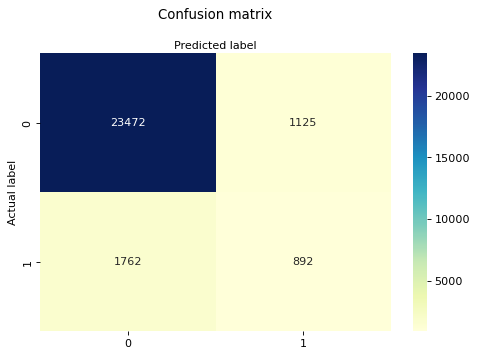

In [138]:
#wizulaizacja dla confusion_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 4), dpi=80)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_knn )), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [142]:
#https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
#2 podejście
#Korzystanie z walidacji krzyżowej w celu uzyskania najlepszej wartości k z nacikiem na recall
cols  =['est_diameter_max', 'relative_velocity','miss_distance', 'absolute_magnitude']
X = df[cols].to_numpy()
X

array([[2.67941497e+00, 1.35692492e+04, 5.48397441e+07, 1.67300000e+01],
       [5.94346868e-01, 7.35887267e+04, 6.14381265e+07, 2.00000000e+01],
       [1.61450717e+00, 1.14258692e+05, 4.97987249e+07, 1.78300000e+01],
       ...,
       [7.14562102e-02, 7.56680773e+03, 2.84007682e+07, 2.46000000e+01],
       [1.63696720e-02, 6.91991545e+04, 6.86920605e+07, 2.78000000e+01],
       [8.91332986e-02, 2.70244556e+04, 5.97721306e+07, 2.41200000e+01]])

In [144]:
y = df['hazardous_True'].to_numpy()
y

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [157]:
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,30)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, scoring='recall', cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Recall Score')

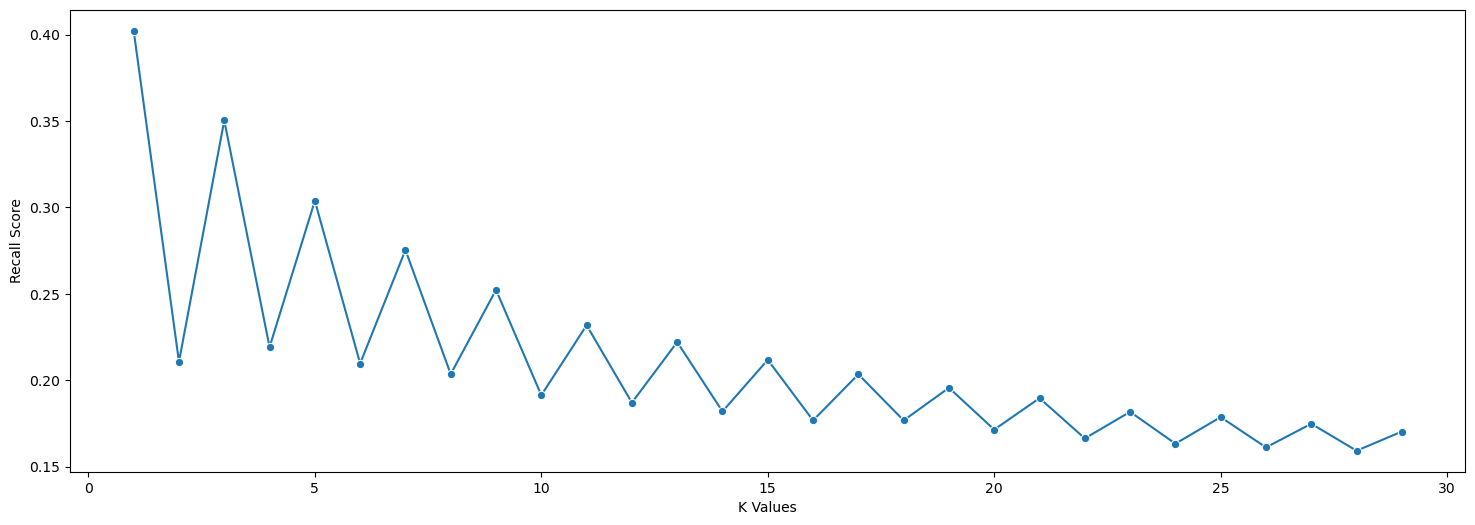

In [158]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Recall Score")

In [159]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [160]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8876004550291733
Precision: 0.42337954289996255
Recall: 0.42577241899020346


In [156]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     24597
           1       0.42      0.43      0.42      2654

    accuracy                           0.89     27251
   macro avg       0.68      0.68      0.68     27251
weighted avg       0.89      0.89      0.89     27251



In [161]:
#Korzystanie z walidacji krzyżowej w celu uzyskania najlepszej wartości k z nacikiem na accuracy
k_values = [i for i in range (1,30)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

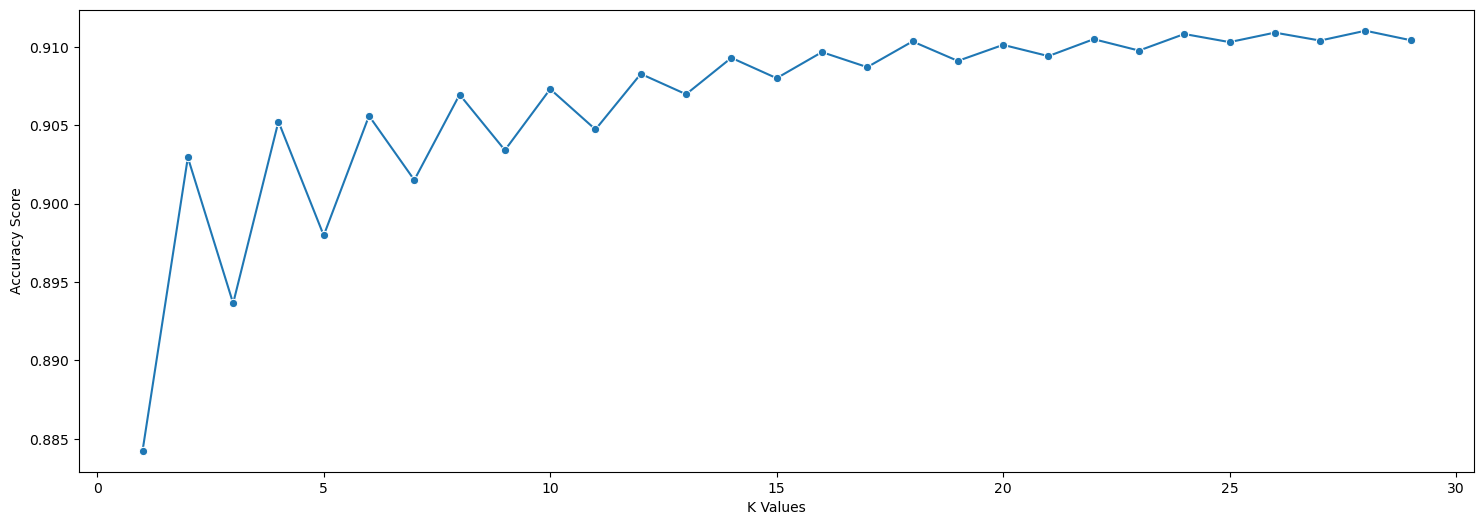

In [162]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [163]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=28)

In [164]:
y_pred_2 = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_2)
precision = precision_score(y_test, y_pred_2)
recall = recall_score(y_test, y_pred_2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9092877325602731
Precision: 0.6590909090909091
Recall: 0.14204973624717407
